# Kartikay Mahajan

# Sparks Task-2 

## imports 

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


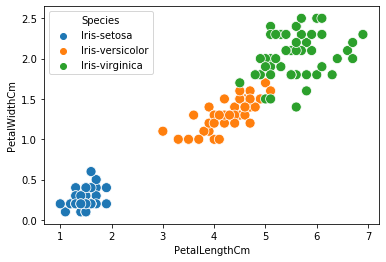

In [19]:
sns.scatterplot(x = iris['PetalLengthCm'],y = iris['PetalWidthCm'],hue = iris['Species'],s =100)
plt.show()

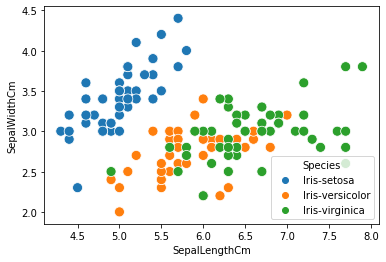

In [21]:
sns.scatterplot(x = iris['SepalLengthCm'],y = iris['SepalWidthCm'],hue = iris['Species'],s = 100)
plt.show()

## Data Preprocessing 

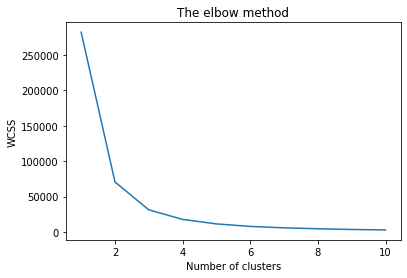

In [22]:
X = iris.drop('Species',axis=1)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.lineplot(x = range(1, 11),y = wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Training the model

In [30]:
iris_model=KMeans(n_clusters=3)
y_kmeans=iris_model.fit_predict(X)

In [24]:
iris_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
iris_model.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026]])

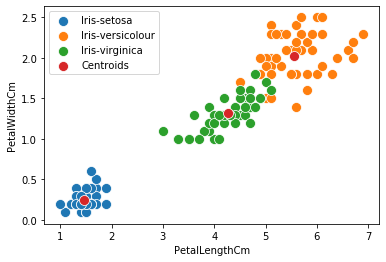

In [33]:
# Visualising the clusters - On the two columns
sns.scatterplot(x = X[y_kmeans == 0]['PetalLengthCm'],y = X[y_kmeans == 0]['PetalWidthCm'], 
            s = 100, label = 'Iris-setosa')
sns.scatterplot(x = X[y_kmeans == 1]['PetalLengthCm'],y = X[y_kmeans == 1]['PetalWidthCm'], 
            s = 100, label = 'Iris-versicolour')
sns.scatterplot(x = X[y_kmeans == 2]['PetalLengthCm'],y = X[y_kmeans == 2]['PetalWidthCm'],
            s = 100, label = 'Iris-virginica')

# Plotting the centroids of the c

# Plotting the centroids of the clusters
sns.scatterplot(x = iris_model.cluster_centers_[:, 3],y = iris_model.cluster_centers_[:,4], 
            s = 100, label = 'Centroids')

plt.show()